## 1106 과제

### chap3 연습문제 1번
#### MNIST 데이터 셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요. 힌트: KNeighborsClassifier가 이 작업에 아주 잘 맞습니다. 좋은 하이퍼파라미터 값만 찾으면 됩니다(weights와 n_neighbors 하이퍼파라미터로 그리드 탐색을 시도해보세요).

In [15]:
import os
import numpy as np

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set()

# 한글출력
matplotlib.rc('font', family='DejaVu Sans')
plt.rcParams['axes.unicode_minus'] = False

#### MNIST

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


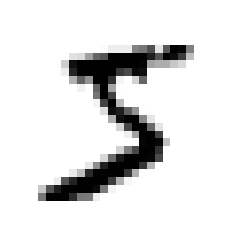

In [16]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")


plt.show()

In [18]:
y[0]

'5'

In [19]:
y= y.astype(np.uint8)

In [20]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")


In [21]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], y[60000:] 

In [23]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

In [28]:
#SGDClassifier모델 평가
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#분류기 생성

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=12.1min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.1min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=12.2min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 24.4min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=12.0min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=12.1min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.970, total=12.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=12.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=19.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=14.1min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=13.9min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 371.9min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [30]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [31]:
grid_search.best_score_ #97% 정확도 달성

0.9716166666666666

### chap4 연습문제 1번
#### 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 알고리즘을 사용할 수 있을까요?

수백만 개의 특성이 있는 훈련 세트에서는 확률적 경사 하강법이나 미니배치 경사 하강법을 사용할 수 있다. 

### chap4 연습문제 11번
#### 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요, 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할까요?

낮과 밤, 실내와 실내에 따라 사진을 구분하는 경우 이 둘은 배타적인 클래스가 아니기 때문에 두 개의 로지스틱 회귀 분류기를 만들어야한다. 